In [18]:
import pandas as pd
import numpy as np
from math import log
from collections import Counter
import math
import matplotlib.pyplot as plt
%matplotlib notebook

loc = r"C:\Users\HP\OneDrive\Desktop\Belgum.csv"  # location of our source dataset
df = pd.read_csv(loc, encoding='latin1')

amount = list(df['Credit'])

In [3]:
first_digit = list()
benford = list()
digit = list()
count = list()  # list containing the count of digits from 1-9 in original dataset
for amt in amount:
    if (len(str(amt))>0):
        first_digit.append(str(amt)[0])

for d in range(1, 10):
    digit.append(d)
    benford.append((log(d + 1, 10) - log(d, 10)))

for value in sorted(Counter(first_digit)):
    count.append(Counter(first_digit)[value])
size = len(df)  # totals rows in our dataset
Z_value = 1.96  # Z Value for 95% confidence

upper_limit = list()  # list having acceptable upper limit for our distribution
lower_limit = list()  # list having acceptable lower limit for our distribution

frequency = list()  # list having the actual distribution of all the digits from original dataset
deviation = list()

for x in range(len(digit)):
    if (count[x] != 0):
        calc = benford[x] + (Z_value) * (math.sqrt(benford[x] * (1 - benford[x]) / size)) + 1 / (2 * size)
        upper_limit.append(calc)
        calc = benford[x] - (Z_value) * (math.sqrt(benford[x] * (1 - benford[x]) / size)) - 1 / (2 * size)
        lower_limit.append(calc)
        frequency.append((count[x] / size))
    else:
        upper_limit.append(0)
        lower_limit.append(0)
        frequency.append(0)

for x in range(len(digit)):
    if (frequency[x] != 0):
        value = benford[x] - frequency[x]
        deviation.append(value)
    else:
        deviation.append(0)

# making a datafram from al the lists we calculated fro digits from 1-9 above
final_data = pd.DataFrame(list(zip(digit, benford, upper_limit, lower_limit, frequency, deviation)),
                          columns=['First Digit', 'Benford Dist', 'Upper Limit', 'Lower Limit', 'Frequency',
                                   'Deviation'])

print(final_data) #highest deviations found for first digit as 1
print("\n")

   First Digit  Benford Dist  Upper Limit  Lower Limit  Frequency  Deviation
0            1      0.301030     0.320416     0.281644   0.163034   0.137996
1            2      0.176091     0.192228     0.159955   0.046776   0.129316
2            3      0.124939     0.138976     0.110901   0.036785   0.088154
3            4      0.096910     0.109494     0.084326   0.059946   0.036965
4            5      0.079181     0.090687     0.067676   0.021344   0.057837
5            6      0.066947     0.077613     0.056281   0.027248   0.039699
6            7      0.057992     0.067981     0.048002   0.036331   0.021661
7            8      0.051153     0.060582     0.041724   0.016803   0.034350
8            9      0.045757     0.054712     0.036803   0.019074   0.026684




<IPython.core.display.Javascript object>


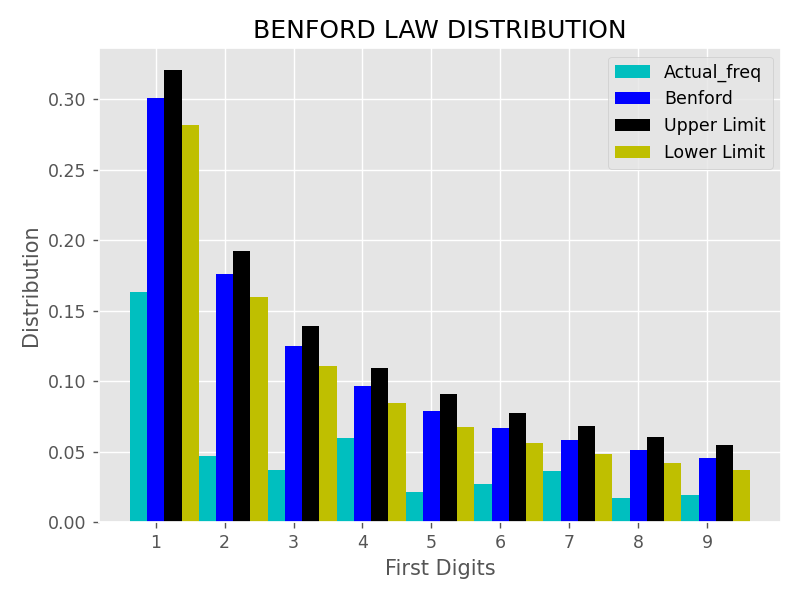

In [19]:
#plotting:
#clustered columns having upper limit and lower limit as well

indexes = np.arange(len(digit)) 
w = 0.25 #for adjusting column of every entity
plt.style.use('ggplot')
plt.title('BENFORD LAW DISTRIBUTION')
plt.xlabel('First Digits')
plt.ylabel('Distribution')
plt.xticks(ticks = indexes , labels = digit) #to show proper x values on the ages line
plt.bar(indexes - w, frequency , width = w, color='c', linewidth = 1, label = 'Actual_freq' )
plt.bar(indexes, benford ,width = w, color = 'b', linewidth=1, label = 'Benford')
plt.bar(indexes + w, upper_limit ,width = w ,color = 'k' ,linewidth = 1, label = 'Upper Limit')
plt.bar(indexes + 2*w, lower_limit ,width = w,color = 'y',linewidth = 1, label = 'Lower Limit')
plt.legend()
plt.grid(True)
plt.savefig('BL_clustered_column.png')
plt.tight_layout() #adjusts the padding for better understanding of the graph
plt.show()

<IPython.core.display.Javascript object>


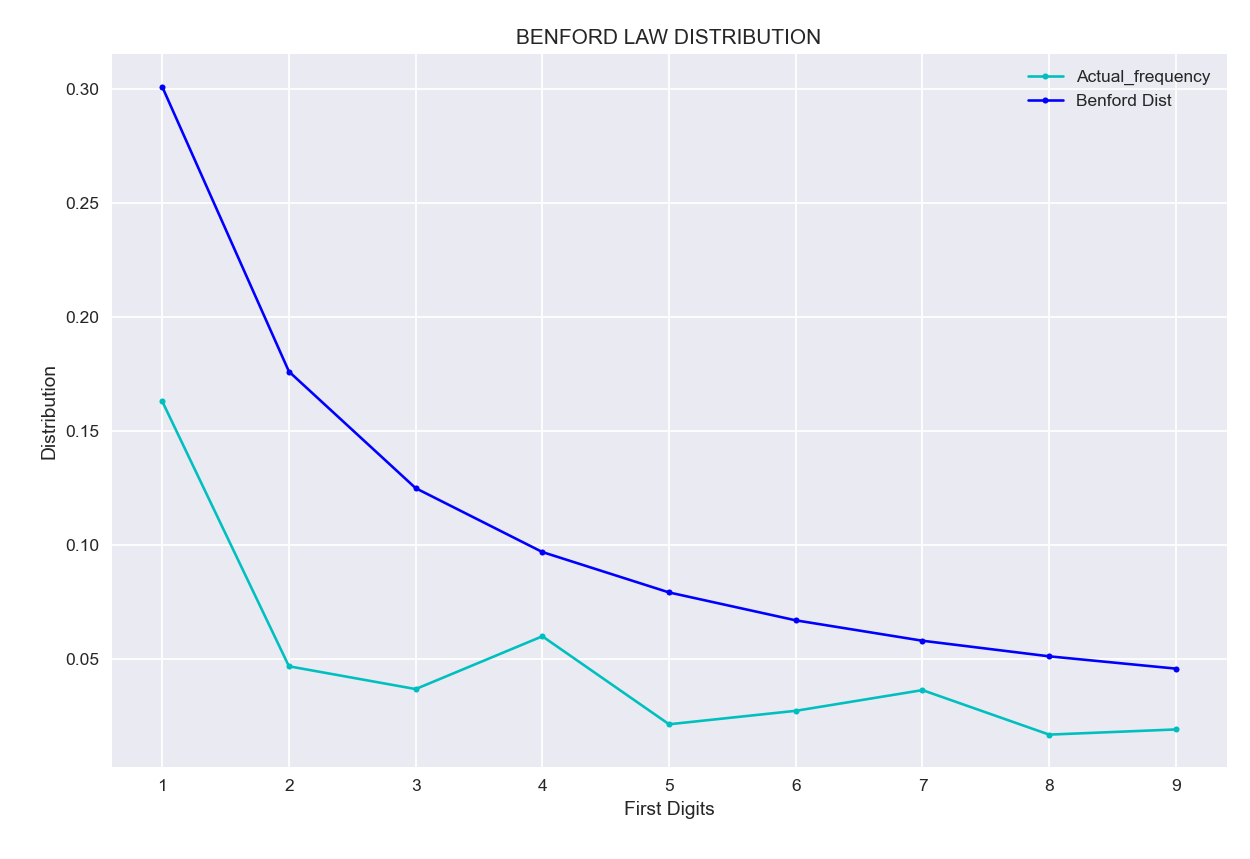

In [20]:
#plotting:
#line chart having upper limit and lower limit as well
plt.style.use('seaborn')
plt.title('BENFORD LAW DISTRIBUTION')
plt.xlabel('First Digits')
plt.ylabel('Distribution')
plt.plot(digit, frequency , color = 'c', marker = '.', linewidth = 1.5, label = 'Actual_frequency')
plt.plot(digit, benford ,color='b', marker = '.',linewidth = 1.5, label = 'Benford Dist')
plt.legend()
plt.grid(True)
plt.savefig('BL_Line_Chart.png')
plt.tight_layout() #adjusts the padding for better understanding of the graph
plt.show()

In [4]:
#For first digit as "1":
first_digit_1 = list()
for amt in amount:
    if (str(amt)[0] == '1' and len(str(amt)) > 1):
        first_digit_1.append(str(amt)[1])
benford_1 = list()
digit1 = list()
for d in range(0, 10):
    digit1.append(d)
    a = log(10 * 1 + d + 1) - log(10 * 1 + d) #here 1 because we are studying when First digit is '1'
    benford_1.append(a)
count_1 = list()
for value in sorted(Counter(first_digit_1)):
    count_1.append(Counter(first_digit_1)[value])

upper_limit_1 = list()  # list having acceptable upper limit for our distribution
lower_limit_1 = list()  # list having acceptable lower limit for our distribution

frequency_1 = list()
deviation_1 = list()

for x in range(len(digit1)):
    if (count_1[x] != 0):
        calc = benford_1[x] + (Z_value) * (math.sqrt(benford_1[x] * (1 - benford_1[x]) / size)) + 1 / (2 * size)
        upper_limit_1.append(calc)
        calc = benford_1[x] - (Z_value) * (math.sqrt(benford_1[x] * (1 - benford_1[x]) / size)) - 1 / (2 * size)
        lower_limit_1.append(calc)
        frequency_1.append((count_1[x] / size))
    else:
        upper_limit_1.append(0)
        lower_limit_1.append(0)
        frequency_1.append(0)

for x in range(len(digit1)):
    if (frequency_1[x] != 0):
        value = benford_1[x] - frequency_1[x]
        deviation_1.append(value)
    else:
        deviation_1.append(0)

# making a datafram from al the lists we calculated from digits from 1-9 above
final_data_1 = pd.DataFrame(list(zip(digit1, benford_1, upper_limit_1, lower_limit_1, frequency_1, deviation_1)),
                            columns=['Second Digit', 'Benford Dist', 'Upper Limit', 'Lower Limit', 'Frequency',
                                     'Deviation'])
print(final_data_1) #Here, highest deviations found for second digit as '1'
print("\n")

   Second Digit  Benford Dist  Upper Limit  Lower Limit  Frequency  Deviation
0             0      0.095310     0.107802     0.082818   0.029973   0.065337
1             1      0.087011     0.099011     0.075012   0.016349   0.070663
2             2      0.080043     0.091604     0.068481   0.019982   0.060061
3             3      0.074108     0.085276     0.062940   0.014986   0.059122
4             4      0.068993     0.079806     0.058180   0.013624   0.055369
5             5      0.064539     0.075028     0.054049   0.021798   0.042740
6             6      0.060625     0.070819     0.050430   0.011353   0.049271
7             7      0.057158     0.067082     0.047235   0.006358   0.050801
8             8      0.054067     0.063740     0.044394   0.012716   0.041352
9             9      0.051293     0.060734     0.041852   0.015895   0.035399




In [5]:
#For first two digits as "11":
first_digit_11 = list()
for amt in amount:
    if (len(str(amt)) > 2 and str(amt)[0] == '1' and str(amt)[1] == '1'):
        first_digit_11.append(str(amt)[2])
benford_11 = list()
for d in range(0, 10):
    a = log(10 * 11 + d + 1) - log(10 * 11 + d) # "11" because we have chosen first two digits as 11
    benford_11.append(a)

count_11 = list()

for value in sorted(Counter(first_digit_11)):
    count_11.append(Counter(first_digit_11)[value])

#count_10.insert(9, 0)

upper_limit_11 = list()  # list having acceptable upper limit for our distribution
lower_limit_11 = list()  # list having acceptable lower limit for our distribution

frequency_11 = list()
deviation_11 = list()

for x in range(len(digit1)):
    if (count_11[x] != 0):
        calc = benford_11[x] + (Z_value) * (math.sqrt(benford_11[x] * (1 - benford_11[x]) / size)) + 1 / (2 * size)
        upper_limit_11.append(calc)
        calc = benford_11[x] - (Z_value) * (math.sqrt(benford_11[x] * (1 - benford_11[x]) / size)) - 1 / (2 * size)
        lower_limit_11.append(calc)
        frequency_11.append((count_11[x] / size))
    else:
        upper_limit_11.append(0)
        lower_limit_11.append(0)
        frequency_11.append(0)

for x in range(len(digit1)):
    if (frequency_11[x] != 0):
        value = benford_11[x] - frequency_11[x]
        deviation_11.append(value)
    else:
        deviation_11.append(0)

final_data_11 = pd.DataFrame(list(zip(digit1, benford_11, upper_limit_11, lower_limit_11, frequency_11, deviation_11)),
                             columns=['Third Digit', 'Benford Dist', 'Upper Limit', 'Lower Limit', 'Frequency',
                                      'Deviation'])
print(final_data_11) #115 and 117
print("\n")


   Third Digit  Benford Dist  Upper Limit  Lower Limit  Frequency  Deviation
0            0      0.009050     0.013232     0.004867   0.002725   0.006325
1            1      0.008969     0.013134     0.004804   0.001362   0.007606
2            2      0.008889     0.013036     0.004741   0.001817   0.007072
3            3      0.008811     0.012941     0.004680   0.001362   0.007448
4            4      0.008734     0.012847     0.004620   0.001817   0.006917
5            5      0.008658     0.012755     0.004561   0.000908   0.007750
6            6      0.008584     0.012664     0.004504   0.004087   0.004497
7            7      0.008511     0.012575     0.004447   0.000454   0.008057
8            8      0.008439     0.012487     0.004391   0.000908   0.007531
9            9      0.008368     0.012400     0.004336   0.000908   0.007460




In [21]:
#For first digit as "2":
first_digit_2 = list()
for amt in amount:
    if (str(amt)[0] == '2' and len(str(amt)) > 1):
        first_digit_2.append(str(amt)[1])
benford_2 = list()
digit2 = list()
for d in range(0, 10):
    digit2.append(d)
    a = log(10 * 2 + d + 1) - log(10 * 2 + d) #here 2 because we are studying when First digit is '2'
    benford_2.append(a)
count_2 = list()
for value in sorted(Counter(first_digit_2)):
    count_2.append(Counter(first_digit_2)[value])

upper_limit_2 = list()  # list having acceptable upper limit for our distribution
lower_limit_2 = list()  # list having acceptable lower limit for our distribution

frequency_2 = list()
deviation_2 = list()

for x in range(len(digit2)):
    if (count_2[x] != 0):
        calc = benford_2[x] + (Z_value) * (math.sqrt(benford_2[x] * (1 - benford_2[x]) / size)) + 1 / (2 * size)
        upper_limit_2.append(calc)
        calc = benford_2[x] - (Z_value) * (math.sqrt(benford_2[x] * (1 - benford_2[x]) / size)) - 1 / (2 * size)
        lower_limit_2.append(calc)
        frequency_2.append((count_2[x] / size))
    else:
        upper_limit_2.append(0)
        lower_limit_2.append(0)
        frequency_2.append(0)

for x in range(len(digit2)):
    if (frequency_2[x] != 0):
        value = benford_2[x] - frequency_2[x]
        deviation_2.append(value)
    else:
        deviation_2.append(0)

# making a datafram from al the lists we calculated from digits from 1-9 above
final_data_2 = pd.DataFrame(list(zip(digit2, benford_2, upper_limit_2, lower_limit_2, frequency_2, deviation_2)),
                            columns=['Second Digit', 'Benford Dist', 'Upper Limit', 'Lower Limit', 'Frequency',
                                     'Deviation'])
print(final_data_2) #Here, highest deviations found for second digit as '1'
print("\n")

   Second Digit  Benford Dist  Upper Limit  Lower Limit  Frequency  Deviation
0             0      0.048790     0.058015     0.039565   0.009537   0.039253
1             1      0.046520     0.055544     0.037496   0.005450   0.041070
2             2      0.044452     0.053287     0.035616   0.004995   0.039456
3             3      0.042560     0.051218     0.033901   0.003633   0.038927
4             4      0.040822     0.049314     0.032330   0.002271   0.038551
5             5      0.039221     0.047556     0.030886   0.005904   0.033317
6             6      0.037740     0.045927     0.029554   0.003633   0.034107
7             7      0.036368     0.044414     0.028321   0.005450   0.030918
8             8      0.035091     0.043004     0.027178   0.003633   0.031458
9             9      0.033902     0.041688     0.026115   0.002271   0.031631




In [31]:
#For first two digits as "21":
first_digit_21 = list()
for amt in amount:
    if (len(str(amt)) > 2 and str(amt)[0] == '2' and str(amt)[1] == '1'):
        first_digit_21.append(str(amt)[2])
benford_21 = list()
for d in range(0, 10):
    a = log(10 * 21 + d + 1) - log(10 * 21 + d) # "11" because we have chosen first two digits as 11
    benford_21.append(a)

count_21 = list()

for value in sorted(Counter(first_digit_21)):
    count_21.append(Counter(first_digit_21)[value])

count_21.insert(3,0);
count_21.insert(6,0);
count_21.insert(9,0);

upper_limit_21 = list()  # list having acceptable upper limit for our distribution
lower_limit_21 = list()  # list having acceptable lower limit for our distribution

frequency_21 = list()
deviation_21 = list()

for x in range(len(digit1)):
    if (count_21[x] != 0):
        calc = benford_21[x] + (Z_value) * (math.sqrt(benford_21[x] * (1 - benford_21[x]) / size)) + 1 / (2 * size)
        upper_limit_21.append(calc)
        calc = benford_21[x] - (Z_value) * (math.sqrt(benford_21[x] * (1 - benford_21[x]) / size)) - 1 / (2 * size)
        lower_limit_21.append(calc)
        frequency_21.append((count_21[x] / size))
    else:
        upper_limit_21.append(0)
        lower_limit_21.append(0)
        frequency_21.append(0)

for x in range(len(digit1)):
    if (frequency_21[x] != 0):
        value = benford_21[x] - frequency_21[x]
        deviation_21.append(value)
    else:
        deviation_21.append(0)

final_data_21 = pd.DataFrame(list(zip(digit1, benford_21, upper_limit_21, lower_limit_21, frequency_21, deviation_21)),
                             columns=['Third Digit', 'Benford Dist', 'Upper Limit', 'Lower Limit', 'Frequency',
                                      'Deviation'])
print(final_data_21) #211 and 212
print("\n")


   Third Digit  Benford Dist  Upper Limit  Lower Limit  Frequency  Deviation
0            0      0.004751     0.007850     0.001652   0.002271   0.002480
1            1      0.004728     0.007820     0.001636   0.000454   0.004274
2            2      0.004706     0.007791     0.001620   0.000454   0.004252
3            3      0.004684     0.000000     0.000000   0.000000   0.000000
4            4      0.004662     0.007734     0.001590   0.000908   0.003754
5            5      0.004640     0.007706     0.001575   0.000454   0.004186
6            6      0.004619     0.000000     0.000000   0.000000   0.000000
7            7      0.004598     0.007650     0.001545   0.000454   0.004144
8            8      0.004577     0.007623     0.001530   0.000454   0.004123
9            9      0.004556     0.000000     0.000000   0.000000   0.000000




In [32]:
Third = list()
anomaly = list()
for amt in amount:
    if (len(str(amt)) > 2):
        b = str(amt)[0] + str(amt)[1] + str(amt)[2]
        Third.append(b)
    else:
        Third.append(amt)
df['First_Three'] = Third

for a in Third:
    if(a == '117' or a == '115' or a == '211' or a == '212'):
        anomaly.append('YES')
    else:
        anomaly.append('NO')

df['Anomaly(Y/N)'] = anomaly


In [33]:
df.head(10)

,Date,Particulars,Unnamed: 2,Unnamed: 3,Unnamed: 4,Vch Type,Vch No.,Debit,Credit,First_Three,Anomaly(Y/N)
0,01-04-2020,Cr,Opening Balance,NaN,NaN,NaN,NaN,1477,NaN,nan,NO
1,01-04-2020,Cr,(as per details),NaN,NaN,Receipt,7.0,300000,NaN,nan,NO
2,NaN,NaN,K Kodandarami Reddy,NaN,NaN,NaN,NaN,NaN,6375000.00 Cr,637,NO
3,NaN,NaN,Cash- Bellary,NaN,NaN,NaN,NaN,450000.00 Dr,NaN,nan,NO
4,NaN,NaN,Cash- Chennai,NaN,NaN,NaN,NaN,450000.00 Dr,NaN,nan,NO
5,NaN,NaN,Cash Coimbatore,NaN,NaN,NaN,NaN,70000.00 Dr,NaN,nan,NO
6,NaN,NaN,Cash Davangere,NaN,NaN,NaN,NaN,350000.00 Dr,NaN,nan,NO
7,NaN,NaN,Cash- Haveri,NaN,NaN,NaN,NaN,130000.00 Dr,NaN,nan,NO
8,NaN,NaN,Cash - Hubli,NaN,NaN,NaN,NaN,20000.00 Dr,NaN,nan,NO
9,NaN,NaN,Cash Koppal,NaN,NaN,NaN,NaN,585000.00 Dr,NaN,nan,NO
